In [ ]:
import sys
!{sys.executable} -m pip install lazypredict
!{sys.executable} -m pip install plotly.express
!{sys.executable} -m pip install prettytable


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Importing Modules and Datasets

In [ ]:

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
from prettytable import PrettyTable

# collect the csv file data
math = pd.read_csv('Maths.csv',index_col=None)
portuguese = pd.read_csv('Portuguese.csv',index_col=None)
#convert categories into numbers to allow for modeling
LEncode = LabelEncoder()
each_feature = math.select_dtypes(include = ['object']).columns
for column in each_feature:
    math[column] = LEncode.fit_transform(math[column])
math

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,9,9
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,14,16,16
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,10,8,7
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,11,12,10


# Math Class

## Training Math Dataset from Grades 
Determine - using lazy classifier - the best model for predicting grades based on all the various features

In [ ]:
math_x = math.copy();
math_x.drop('G3',axis = 1,inplace = True)
math_y = math['G3']
math_x_train_t, math_x_test, math_y_train, math_y_test = train_test_split(math_x, math_y, test_size=0.2,random_state=0)
standScale = StandardScaler()
math_x_train = standScale.fit_transform(math_x_train_t)
math_x_test = standScale.transform(math_x_test)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
model_math,prediction_math = clf.fit(math_x_train, math_x_test, math_y_train, math_y_test)


100%|██████████| 29/29 [00:07<00:00,  3.89it/s]


Plot all the different models' accuracy for determining students' grades in Math based on a list of 30+ features such as sex, age, Father's education etc....

Then determine which model is most accurate by sorting the plot and picking the 1st model- ie most accurate model. We can use this most accurate model later to determine the importance of each feature

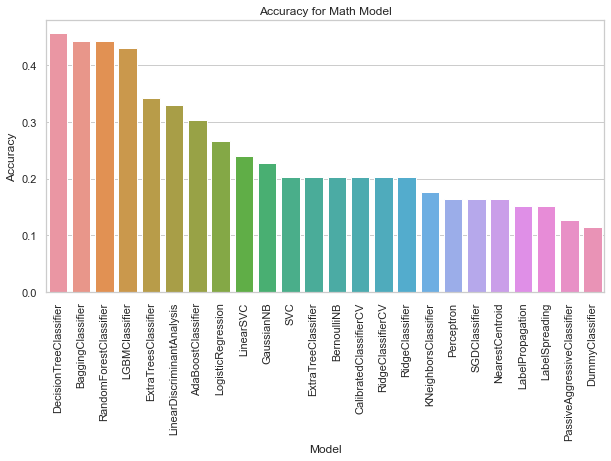

In [ ]:
model_math.sort_values(by = 'Accuracy',inplace = True,ascending = False)
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=model_math.index, y="Accuracy", data=model_math)
plt.xticks(rotation=90)
plt.title('Accuracy for Math Model')
plt.show()

In [ ]:
Create a new training set that has all features excluding prior grades to determine overall grades

In [ ]:
math_x = math.copy();
math_x.drop('G3',axis = 1,inplace = True)
math_y = math['G3']
math_x.drop('G1',axis = 1,inplace = True)
math_x.drop('G2',axis = 1,inplace = True)
math_x_train_t, math_x_test, math_y_train, math_y_test = train_test_split(math_x, math_y, test_size=0.2,random_state=0)
standScale = StandardScaler()
math_x_train = standScale.fit_transform(math_x_train_t)
math_x_test = standScale.transform(math_x_test)


## Prediction With the Most Successful Model
take the most successful prediction model from the accuracy plot - in this case Decision Tree Classifier - and plot the predicted data determined through this model. Plot the Comparison between predicted data versus actual data, the difference between predicted and actual data, and then the error rate of predicted versus actual data 

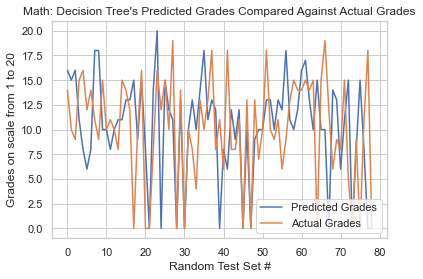

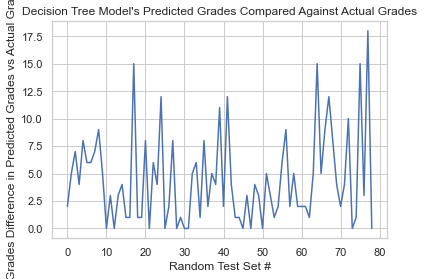

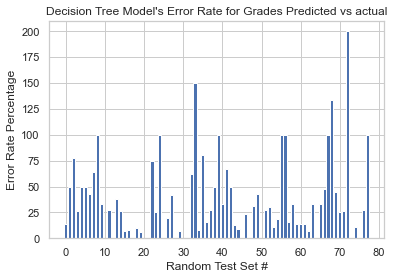

In [ ]:

clf = DecisionTreeClassifier()
clf.fit(math_x_train, math_y_train)
predictions = clf.predict(math_x_test)
plt.plot(range(len(predictions)), predictions, label ="")
plt.plot(range(len(predictions)), math_y_test, label ="")
plt.title("Math: Decision Tree's Predicted Grades Compared Against Actual Grades")
plt.xlabel("Random Test Set #")
plt.ylabel("Grades on scale from 1 to 20")
plt.legend(["Predicted Grades", "Actual Grades"], loc ="lower right")
plt.show()
plt.plot(range(len(predictions)), abs(math_y_test-predictions))
plt.title("Decision Tree Model's Predicted Grades Compared Against Actual Grades")
plt.xlabel("Random Test Set #")
plt.ylabel("Grades Difference in Predicted Grades vs Actual Grades")
# zero means perfect correlation
plt.show()
# plot predictions, and the y_tEst OveR math_x_tesT to see how well prediction preformed
# Error Rate = |Observed Value - Actual Value|/Actual Value × 100
plt.bar(range(len(predictions)), abs(predictions-math_y_test)/math_y_test *100 )
plt.title("Decision Tree Model's Error Rate for Grades Predicted vs actual")
plt.xlabel("Random Test Set #")
plt.ylabel("Error Rate Percentage")
# zero means perfect correlation
plt.show()

# Feature Importance For Math
## Determined Through Most Accurate Model
Decision Tree Regressor Model determines which features - such as absences and failures - are most important in predicting students' grades


Feature importance by sklearn: {'school': 0.004, 'sex': 0.03, 'age': 0.031, 'address': 0.004, 'famsize': 0.008, 'Pstatus': 0.003, 'Medu': 0.016, 'Fedu': 0.025, 'Mjob': 0.07, 'Fjob': 0.049, 'reason': 0.009, 'guardian': 0.042, 'traveltime': 0.019, 'studytime': 0.055, 'failures': 0.111, 'schoolsup': 0.038, 'famsup': 0.01, 'paid': 0.009, 'activities': 0.004, 'nursery': 0.015, 'higher': 0.034, 'internet': 0.006, 'romantic': 0.01, 'famrel': 0.031, 'freetime': 0.024, 'goout': 0.042, 'Dalc': 0.013, 'Walc': 0.073, 'health': 0.029, 'absences': 0.186}


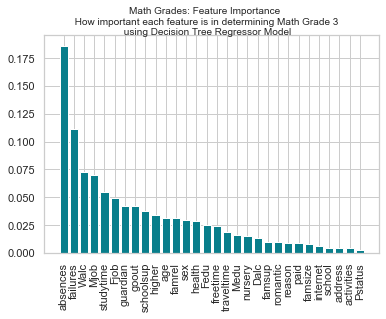

In [ ]:
features = math_x.columns.tolist()
#paramters for decision tree regressor
tree = DecisionTreeRegressor()

# Fitting on the training data 
tree.fit(math_x_train, math_y_train)
importances_sk = tree.feature_importances_
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)
feature_importance_keys = sorted(feature_importance_sk, key=feature_importance_sk.get, reverse = True)

sorted_feature_importance = {}

for w in feature_importance_keys:
    sorted_feature_importance[w] = feature_importance_sk[w]

print(f"Feature importance by sklearn: {feature_importance_sk}")
names = list(sorted_feature_importance.keys())
values = list(sorted_feature_importance.values())
plt.bar(x=names, height=values, color='#087E8B')
plt.suptitle('Math Grades: Feature Importance \n How important each feature is in determining Math Grade 3 \n using Decision Tree Regressor Model', size=10)
plt.xticks(rotation='vertical')
plt.show()


Explanation of most important features. Along with how alchohol consumption ranks on features that predict student's grades and what percent alchohol consumption contributes to overall grade prediction.

In [ ]:
FeatureTable = PrettyTable(["The 5 most important feautures"])
FeatureTable.add_row([str(list(sorted_feature_importance.keys())[:5])])
print(FeatureTable)
rankWalc = names.index('Walc') + 1
WalcImportance =  str(sorted_feature_importance.get('Walc')*100)
rankDalc = list(sorted_feature_importance).index('Dalc') + 1                     
DalcImportance =  str(sorted_feature_importance.get('Dalc') *100)
print("Weekend Alchohol consumption ranks #" + str(rankWalc) + " and determines " \
 + WalcImportance + " Percent of the overall grade")
print("WeekDAY Alchohol consumption ranks #" + str(rankDalc) + " and determines " \
 + DalcImportance + " Percent of the overall grade")

+-------------------------------------------------------+
|             The 5 most important feautures            |
+-------------------------------------------------------+
| ['absences', 'failures', 'Walc', 'Mjob', 'studytime'] |
+-------------------------------------------------------+
Weekend Alchohol consumption ranks #3 and determines 7.3 Percent of the overall grade
WeekDAY Alchohol consumption ranks #20 and determines 1.3 Percent of the overall grade


# Portuguese Class

In [ ]:
each_feature = portuguese.select_dtypes(include = ['object']).columns
for column in each_feature:
    portuguese[column] = LEncode.fit_transform(portuguese[column])
portuguese

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,0,19,0,0,1,2,3,3,2,...,5,4,2,1,2,5,4,10,11,10
645,1,0,18,1,1,1,3,1,4,3,...,4,3,4,1,1,1,4,15,15,16
646,1,0,18,1,0,1,1,1,2,2,...,1,1,1,1,1,5,6,11,12,9
647,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,6,10,10,10


## Training Portuguese Dataset from Grades 
Determine - using lazy classifier - the best model for predicting grades based on all the various features

In [ ]:

portuguese_x = portuguese.copy();
portuguese_x.drop('G3',axis = 1,inplace = True)
portuguese_y = portuguese['G3']
portuguese_x_train_t, portuguese_x_test, portuguese_y_train, portuguese_y_test = train_test_split(portuguese_x, portuguese_y, test_size=0.2,random_state=0)
standScale = StandardScaler()
portuguese_x_train = standScale.fit_transform(portuguese_x_train_t)
portuguese_x_test = standScale.transform(portuguese_x_test)

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
model_portuguese,prediction_portuguese = clf.fit(portuguese_x_train, portuguese_x_test, portuguese_y_train, portuguese_y_test)

100%|██████████| 29/29 [00:11<00:00,  2.58it/s]


Plot all the different models' accuracy for determining students' grades in Portuguese class based on a list of 30+ features such as sex, age, Father's education etc....

Then determine which model is most accurate by sorting the plot and picking the 1st model- ie most accurate model. We can use this most accurate model later to determine the importance of each feature

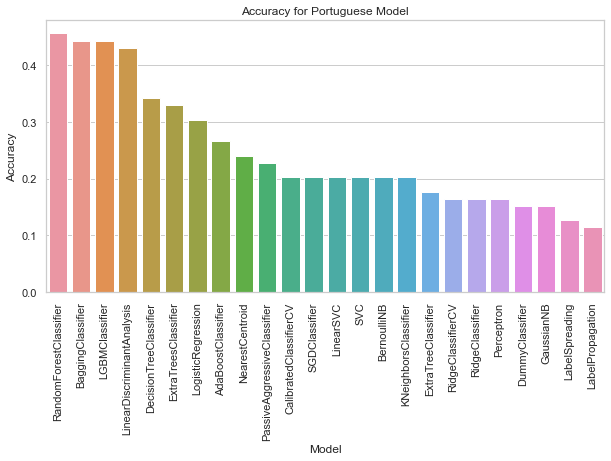

In [ ]:
model_portuguese.sort_values(by = 'Accuracy',inplace = True,ascending = False)
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=model_portuguese.index, y="Accuracy", data=model_math)
plt.xticks(rotation=90)
plt.title('Accuracy for Portuguese Model')
plt.show()

In [ ]:
portuguese_x = portuguese.copy();
portuguese_x.drop('G3',axis = 1,inplace = True)
portuguese_x.drop('G1',axis = 1,inplace = True)
portuguese_x.drop('G2',axis = 1,inplace = True)
portuguese_y = portuguese['G3']
portuguese_x_train_t, portuguese_x_test, portuguese_y_train, portuguese_y_test = train_test_split(portuguese_x, portuguese_y, test_size=0.2,random_state=0)
standScale = StandardScaler()
portuguese_x_train = standScale.fit_transform(portuguese_x_train_t)
portuguese_x_test = standScale.transform(portuguese_x_test)

## Prediction With the Most Successful Model
take the most successful prediction model from the accuracy plot - in this case Random Forest Classifier - and plot the predicted data determined through this model. Plot the Comparison between predicted data versus actual data, the difference between predicted and actual data, and then the error rate of predicted versus actual data 

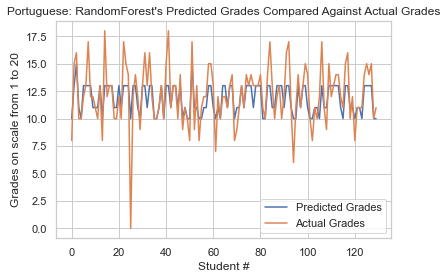

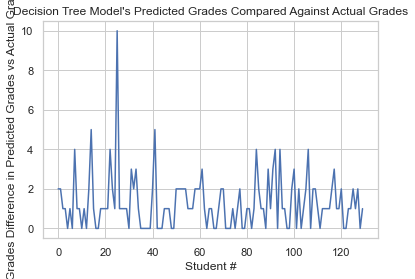

In [ ]:
#Will use random forestclassifier since it is most accurate for Portuguese Data Model
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(portuguese_x_train, portuguese_y_train)
predictions = clf.predict(portuguese_x_test)
plt.plot(range(len(predictions)), predictions, label ="")
plt.plot(range(len(predictions)), portuguese_y_test, label ="")
plt.title("Portuguese: RandomForest's Predicted Grades Compared Against Actual Grades")
plt.xlabel("Student #")
plt.ylabel("Grades on scale from 1 to 20")
plt.legend(["Predicted Grades", "Actual Grades"], loc ="lower right")
plt.show()
plt.plot(range(len(predictions)), abs(portuguese_y_test-predictions))
plt.title("Decision Tree Model's Predicted Grades Compared Against Actual Grades")
plt.xlabel("Student #")
plt.ylabel("Grades Difference in Predicted Grades vs Actual Grades")
#zero means perfect correlation
plt.show()
#plot predictions, and the y_tEst OveR math_x_tesT to see how well prediction preformed

# Feature Importance For Portuguese
## Determined Through Most Accurate Model
Random Forest Regressor Model determines which features - such as absences and failures - are most important in predicting students' grades


Feature importance by sklearn: {'school': 0.032, 'sex': 0.016, 'age': 0.051, 'address': 0.013, 'famsize': 0.01, 'Pstatus': 0.004, 'Medu': 0.038, 'Fedu': 0.037, 'Mjob': 0.029, 'Fjob': 0.032, 'reason': 0.032, 'guardian': 0.015, 'traveltime': 0.016, 'studytime': 0.028, 'failures': 0.218, 'schoolsup': 0.023, 'famsup': 0.021, 'paid': 0.002, 'activities': 0.013, 'nursery': 0.01, 'higher': 0.042, 'internet': 0.011, 'romantic': 0.012, 'famrel': 0.027, 'freetime': 0.034, 'goout': 0.039, 'Dalc': 0.044, 'Walc': 0.046, 'health': 0.028, 'absences': 0.077}


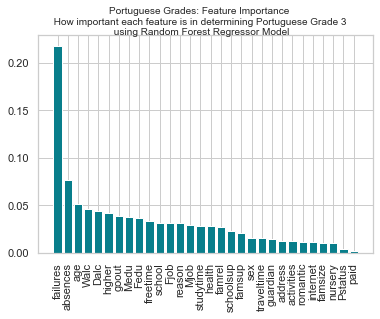

In [ ]:
features = portuguese_x.columns.tolist()
#paramters for decision tree regressor

tree = RandomForestRegressor()

# Fitting on the training data 
tree.fit(portuguese_x_train, portuguese_y_train)
importances_sk = tree.feature_importances_
feature_importance_sk = {}
for i, feature in enumerate(features):
    feature_importance_sk[feature] = round(importances_sk[i], 3)
feature_importance_keys = sorted(feature_importance_sk, key=feature_importance_sk.get, reverse = True)

sorted_feature_importance = {}

for w in feature_importance_keys:
    sorted_feature_importance[w] = feature_importance_sk[w]

print(f"Feature importance by sklearn: {feature_importance_sk}")
names = list(sorted_feature_importance.keys())
values = list(sorted_feature_importance.values())
plt.bar(x=names, height=values, color='#087E8B')
plt.suptitle('Portuguese Grades: Feature Importance \n How important each feature is in determining Portuguese Grade 3 \n using Random Forest Regressor Model', size=10)
plt.xticks(rotation='vertical')
plt.show()


Explanation of most important features. Along with how alchohol consumption ranks on features that predict student's grades and what percent alchohol consumption contributes to overall grade prediction.

In [ ]:
FeatureTable = PrettyTable(["The 5 most important feautures for Portuguese"])
FeatureTable.add_row([str(list(sorted_feature_importance.keys())[:5])])
print(FeatureTable)
rankWalc = names.index('Walc') + 1
WalcImportance =  str(sorted_feature_importance.get('Walc')*100)
rankDalc = list(sorted_feature_importance).index('Dalc') + 1                     
DalcImportance =  str(sorted_feature_importance.get('Dalc') *100)
print("Weekend Alchohol consumption ranks #" + str(rankWalc) + " and contibutes " \
 + WalcImportance + " Percent to the model prediction of the overall grade")
print("WeekDAY Alchohol consumption ranks #" + str(rankDalc) + " and contributes  " \
 + DalcImportance + " Percent to the model prediction of the overall grade")

+-------------------------------------------------+
|  The 5 most important feautures for Portuguese  |
+-------------------------------------------------+
| ['failures', 'absences', 'age', 'Walc', 'Dalc'] |
+-------------------------------------------------+
Weekend Alchohol consumption ranks #4 and contibutes 4.6 Percent to the model prediction of the overall grade
WeekDAY Alchohol consumption ranks #5 and contributes  4.3999999999999995 Percent to the model prediction of the overall grade
